[View in Colaboratory](https://colab.research.google.com/github/manoj9april/MNIST/blob/master/mnist_cnn.ipynb)

In [0]:
import keras

In [0]:
# loading dataset and normalizing it
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x = x_test
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [0]:
import keras.layers as ly
# building the architecture of network
model = keras.models.Sequential();

model.add(ly.Conv2D(16,(3,3),padding="same",input_shape=(28,28,1)))
model.add(ly.Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(ly.MaxPooling2D())
model.add(ly.Flatten())
model.add(ly.Dense(128,activation='relu'))
model.add(ly.Dense(64,activation='relu'))
model.add(ly.Dense(10,activation='softmax'))

In [0]:
# setting optimizers, lossses , etc...
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [54]:
# training the model
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 20s 337us/step - loss: 0.1571 - acc: 0.9522
Epoch 2/4
60000/60000 [==============================] - 20s 328us/step - loss: 0.0560 - acc: 0.9828
Epoch 3/4
60000/60000 [==============================] - 20s 329us/step - loss: 0.0372 - acc: 0.9876
Epoch 4/4
60000/60000 [==============================] - 20s 329us/step - loss: 0.0274 - acc: 0.9912


In [55]:
# evaluating ...
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 0.05510410885570454
Test accuracy: 0.9853


In [0]:
# predicting ...
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

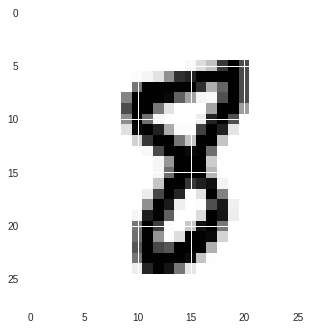

8


In [57]:
idx = 5478
plt.imshow(x[idx])
plt.show()
print(np.argmax(predictions[idx]))

In [0]:
model.save('mnist_model')